In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ml_data\MPG.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df[df.duplicated()].size

0

In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [10]:
X=df.drop('mpg',axis=1)
y=df['mpg']

In [11]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
int_col=X[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model_year']]

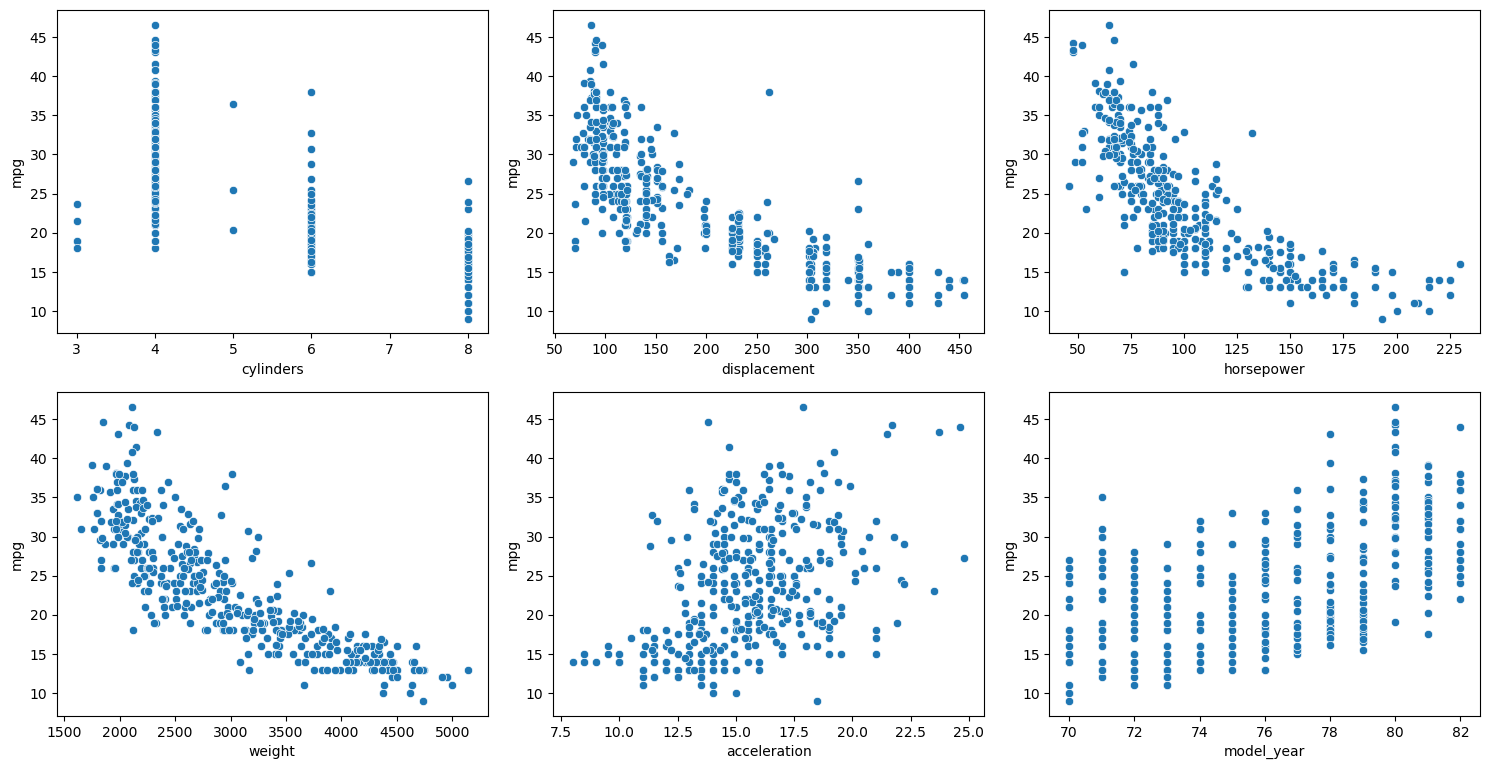

In [13]:


plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in int_col:
    ax=plt.subplot(4,3,plotnumber)
    sns.scatterplot(x=int_col[i],y=y)
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()
         

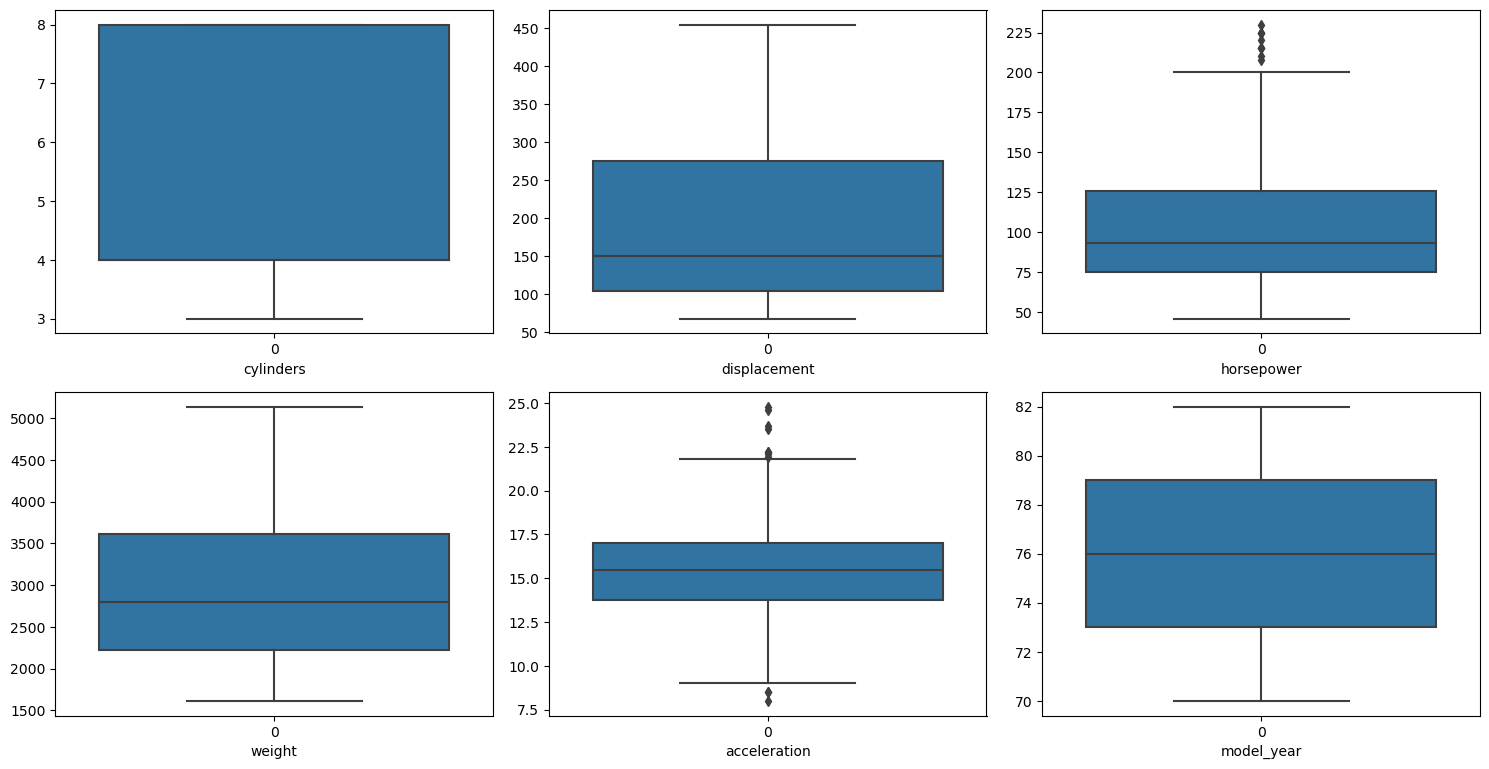

In [14]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in int_col:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(int_col[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [15]:
# removing outliers

In [16]:
outliers=['acceleration','horsepower']
def outlier_capping(dataframe:pd.DataFrame,outliers:list):
    df=dataframe.copy()
    for i in outliers:
        q1=int_col[i].quantile(0.25)
        q3=int_col[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q3-1.5*iqr
        int_col.loc[int_col[i]>upper_limit,i]=upper_limit
        int_col.loc[int_col[i]<lower_limit,i]=lower_limit
    return int_col
int_col=outlier_capping(dataframe=int_col,outliers=outliers)

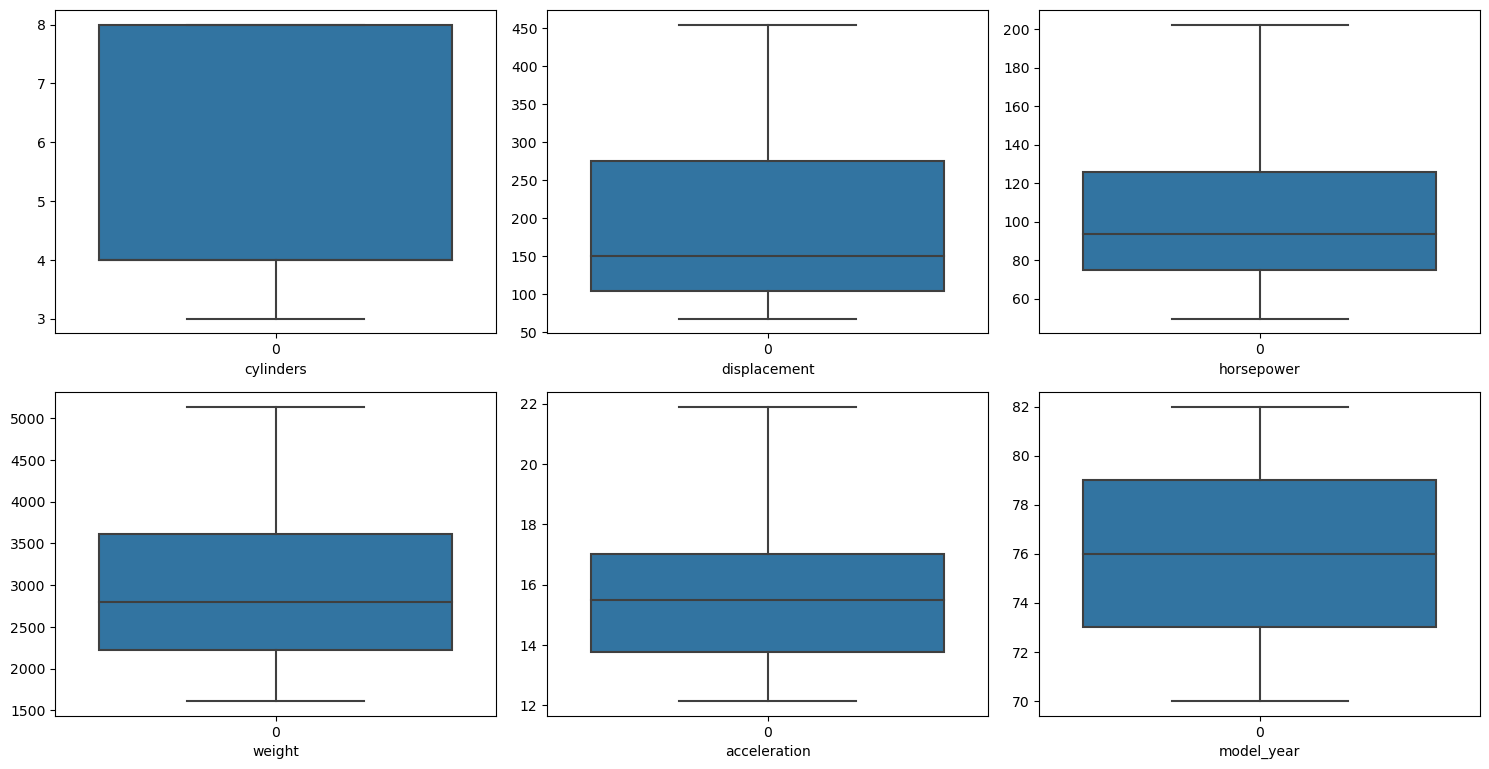

In [17]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in int_col:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(int_col[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [18]:
int_col

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.15,70
1,8,350.0,165.0,3693,12.15,70
2,8,318.0,150.0,3436,12.15,70
3,8,304.0,150.0,3433,12.15,70
4,8,302.0,140.0,3449,12.15,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.60,82
394,4,97.0,52.0,2130,21.90,82
395,4,135.0,84.0,2295,12.15,82
396,4,120.0,79.0,2625,18.60,82


In [19]:
obj_col=X[['origin', 'name']]

In [20]:
X=pd.concat([int_col,obj_col],axis=1)

In [21]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.15,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,12.15,70,usa,buick skylark 320
2,8,318.0,150.0,3436,12.15,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.15,70,usa,amc rebel sst
4,8,302.0,140.0,3449,12.15,70,usa,ford torino


<Axes: >

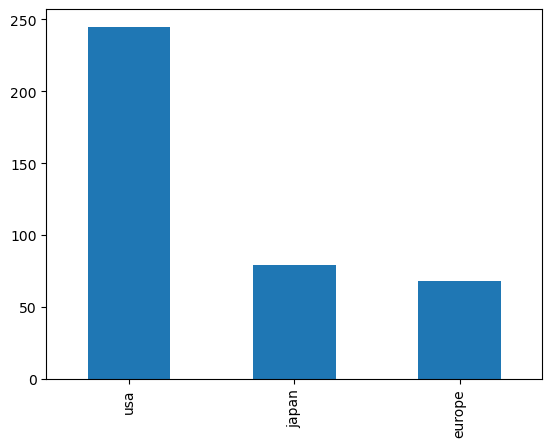

In [22]:
X['origin'].value_counts().plot(kind='bar')

In [23]:
X=X[['cylinders','displacement','horsepower','weight','acceleration','model_year']]

In [24]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-8.72633771e-01, -1.14522465e+00, -1.41222593e+00,
        -1.57177319e+00,  3.46654019e-01, -5.55124530e-01],
       [-8.72633771e-01, -1.05806167e+00, -9.23490381e-01,
        -1.07536930e+00,  1.18383059e+00,  5.32919549e-01],
       [ 1.49192225e+00,  2.27350094e+00,  2.55196239e+00,
         2.32281598e+00, -1.38749746e+00, -8.27135550e-01],
       ...,
       [-8.72633771e-01, -7.57833646e-01, -7.87730507e-01,
        -9.71607919e-01, -5.20014928e-02, -8.27135550e-01],
       [ 3.09644241e-01,  5.39926208e-01, -4.34754835e-01,
         1.85095676e-01, -4.50657005e-01, -1.37115759e+00],
       [ 3.09644241e-01, -2.25171019e-01, -1.90387061e-01,
         2.33414984e-03, -4.50657005e-01, -2.83113511e-01]])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [33]:
y_pred=lr.predict(X_test_scaled)

In [34]:
y_pred

array([27.47293519, 26.45894096, 10.42699017, 33.2101095 , 31.99448712,
       23.35147719, 33.20563238, 25.28601976, 21.08854234, 26.26057059,
       27.67113778, 13.66870173, 25.87762286,  7.72808814, 16.19172159,
       31.9341175 , 26.2133269 , 12.8842085 , 25.9883518 , 27.76407643,
       20.66868998, 17.90186789, 24.81368671, 27.81852478, 31.67005665,
       11.17945915, 29.35863844, 26.64669693, 23.01563084, 15.29944901,
       21.96648445, 29.60163874, 23.94514036, 28.60288013, 22.11516007,
       28.1414973 , 28.04515138, 10.98876391, 14.90597022,  9.7012163 ,
       13.80927992, 33.45915655, 29.4072996 , 13.86511386, 30.82904183,
       14.87386936, 30.82078266, 10.37060235, 17.55510011, 22.29135909,
       26.66545375, 14.69697965,  9.68816927, 24.01798402, 31.50231531,
       25.95164008, 26.41840446, 20.75568914, 30.60784453, 25.65199158,
       19.8680819 , 27.68805468, 31.24163224,  9.75021223, 25.99305758,
       16.93452784,  9.95768548, 30.3286142 , 21.42454245, 32.33

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
r2_score(y_test,y_pred)

0.8006907413653515

In [38]:
mean_absolute_error(y_test,y_pred)

2.628072274096612

In [40]:
mean_squared_error(y_test,y_pred)

11.857011559845919